In [ ]:
#!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
#pip install lazypredict

In [1]:
#@title Load coordinates nearest points
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.pipeline import Pipeline
import pickle
from scipy.stats import chi2_contingency

pd.options.display.max_rows = 999


coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/distan_lat41.296lon2.078p2R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
#@title Load station (present weather). Load meteorological model forecast D0.
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/LEBLY2018Y2022.csv",
                          usecols =["time","skyc1_o"],
                          parse_dates=["time"]).dropna().set_index("time")
#drop /// cloud cover
station = station[station.skyc1_o!="///"]
print("Cloud cover frequencies")
display(station["skyc1_o"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))

#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2020.csv",parse_dates=["time"])

model = pd.concat([mody2018,mody2019,mody2020]).drop(columns=["Unnamed: 0"]).set_index("time")

#concat station file versus meteorological model file same time
df_all = pd.concat([station,model],axis=1).dropna()
df_all["skyc1_o"] = pd.Categorical(df_all["skyc1_o"])




Cloud cover frequencies


FEW    62%
M      29%
SCT     5%
BKN     2%
NSC     1%
OVC     0%
VV      0%
Name: skyc1_o, dtype: object

Round 0


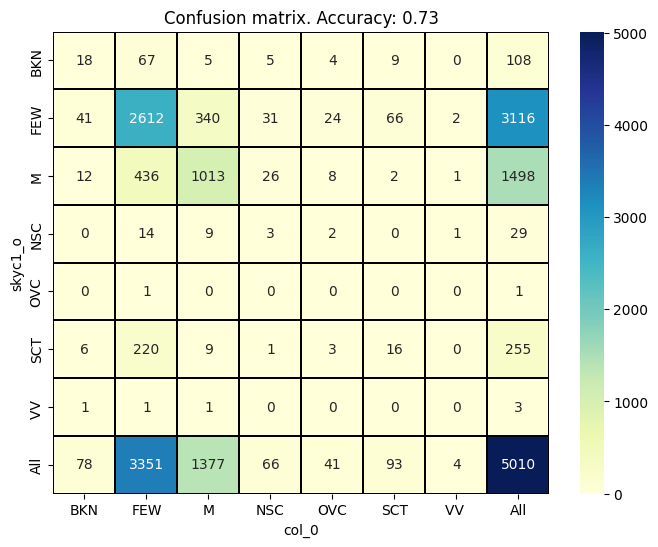

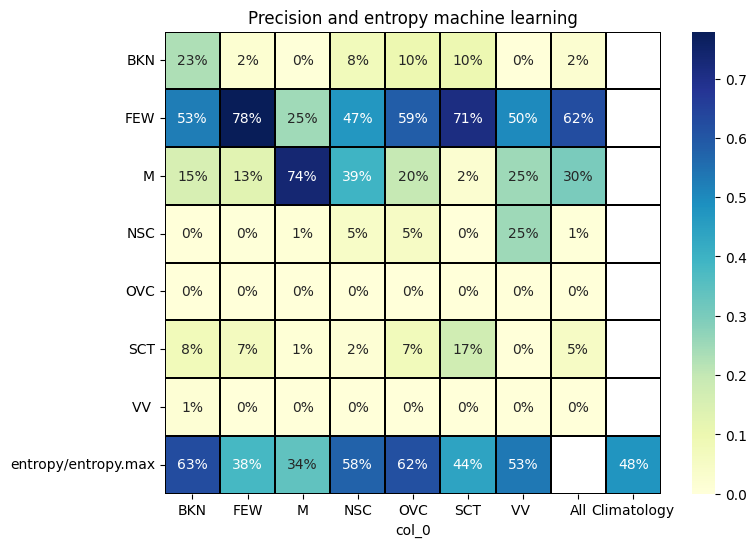

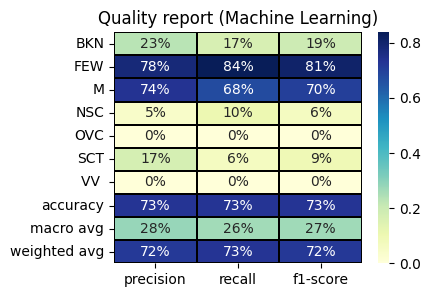

feature feature_per
32          rh1        3.5%
34       lhflx1        3.5%
52    dayofyear        3.4%
39       shflx1        3.3%
25         dir1        3.2%
8   visibility0        3.2%
0          dir0        3.1%
7           rh0        3.0%
35       lwflx1        2.9%
3          mod0        2.8%

Round 1


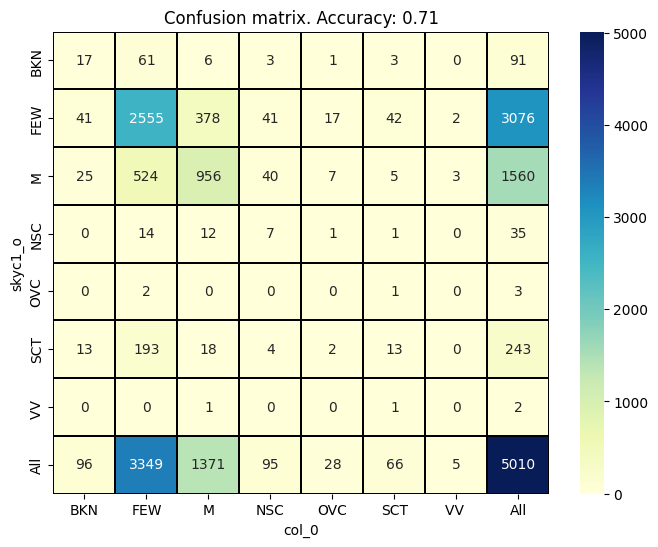

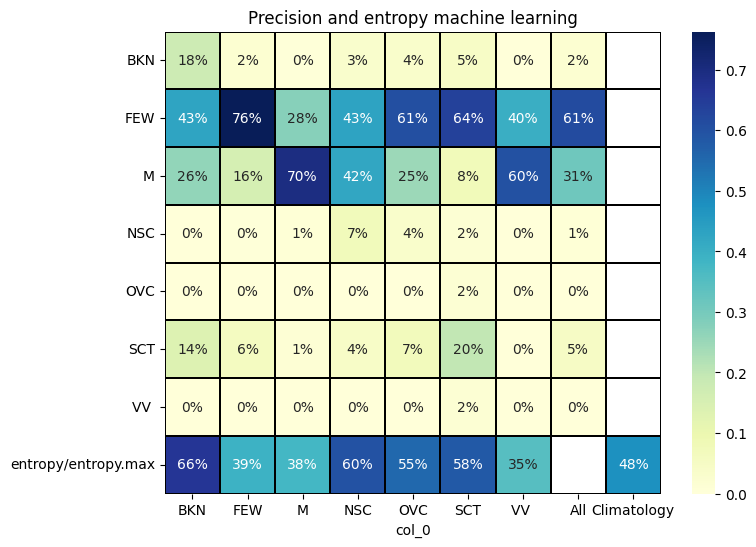

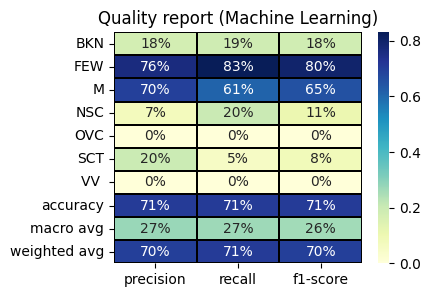

feature feature_per
32          rh1        4.0%
7           rh0        3.9%
0          dir0        3.8%
39       shflx1        3.5%
34       lhflx1        3.5%
25         dir1        3.4%
31        temp1        3.0%
52    dayofyear        3.0%
35       lwflx1        3.0%
8   visibility0        3.0%

Round 2


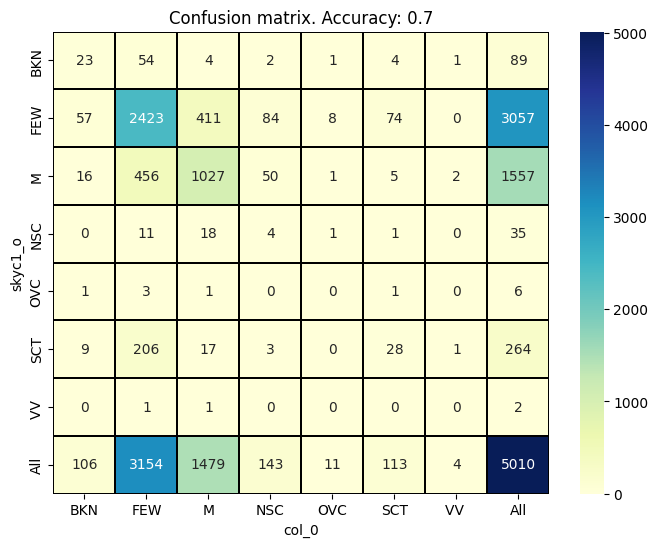

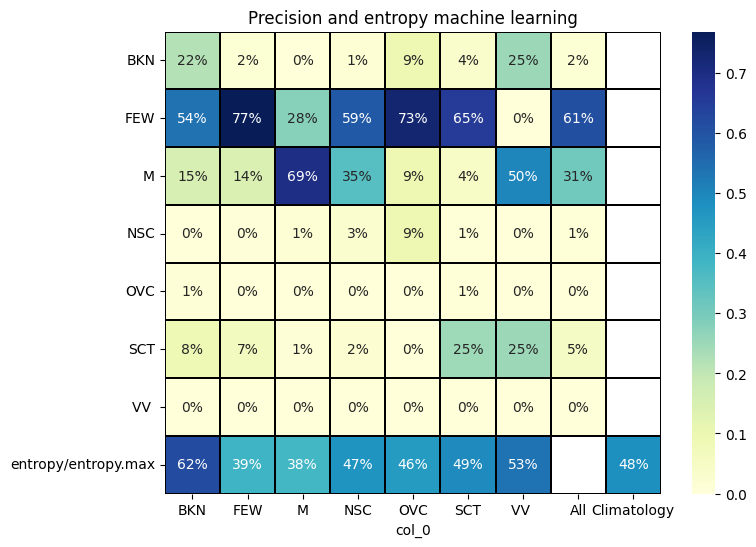

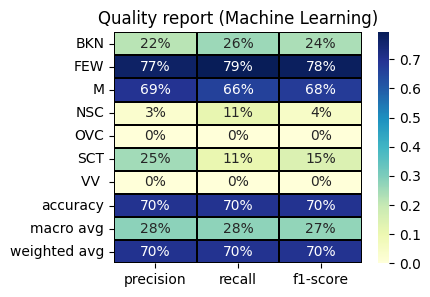

feature feature_per
39       shflx1        4.0%
0          dir0        4.0%
8   visibility0        3.8%
25         dir1        3.5%
52    dayofyear        3.4%
32          rh1        3.3%
34       lhflx1        3.2%
35       lwflx1        2.9%
7           rh0        2.8%
41         cin1        2.8%

Round 3


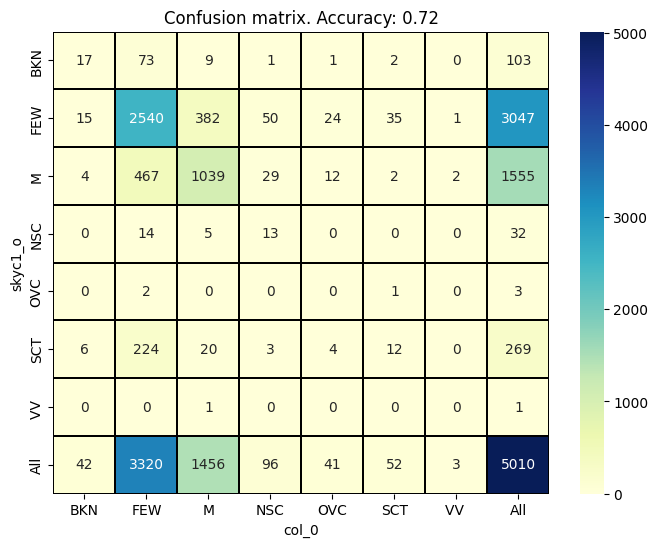

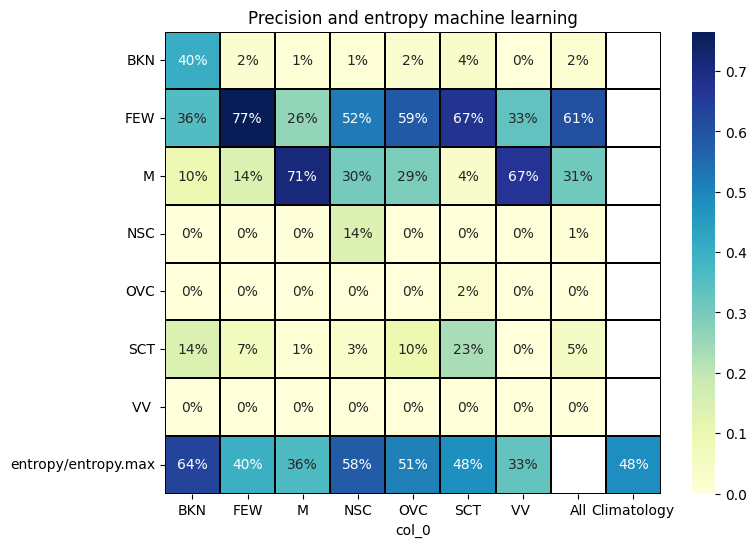

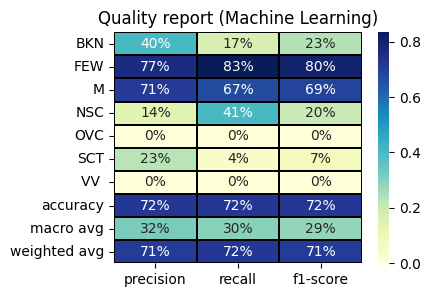

feature feature_per
52    dayofyear        3.9%
34       lhflx1        3.6%
39       shflx1        3.5%
32          rh1        3.5%
25         dir1        3.5%
35       lwflx1        3.2%
8   visibility0        3.2%
0          dir0        3.1%
7           rh0        3.1%
14       shflx0        3.0%

Round 4


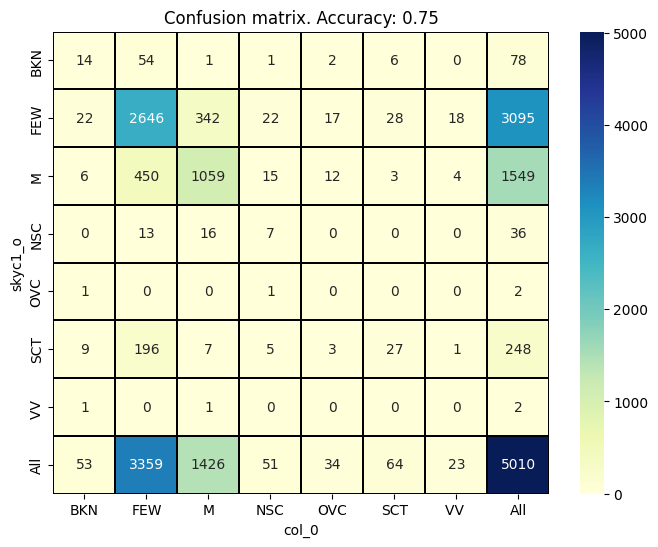

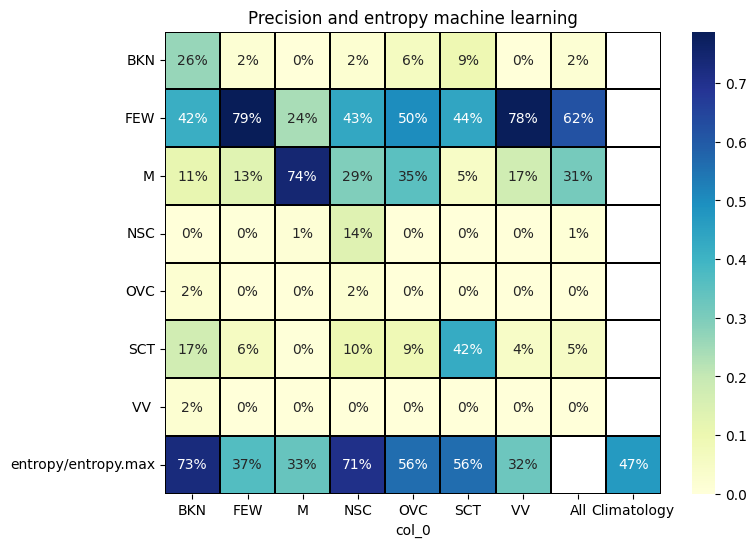

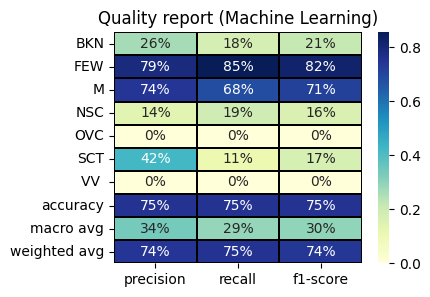

feature feature_per
52    dayofyear        3.5%
0          dir0        3.5%
25         dir1        3.4%
32          rh1        3.4%
34       lhflx1        3.3%
39       shflx1        3.3%
7           rh0        3.2%
8   visibility0        3.1%
3          mod0        2.9%
9        lhflx0        2.8%

Round 5


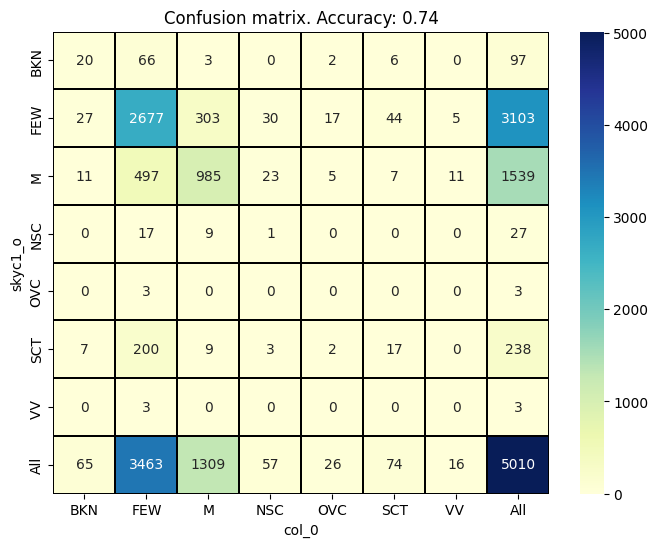

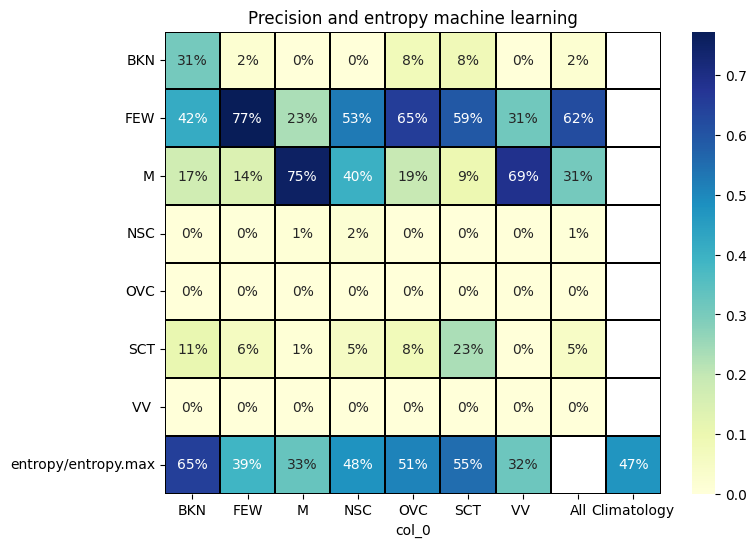

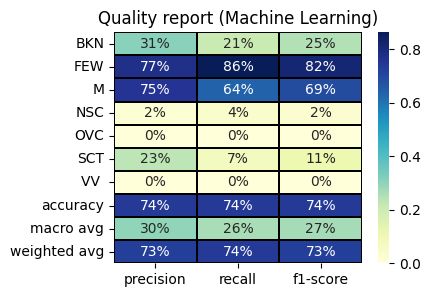

feature feature_per
0          dir0        4.2%
32          rh1        3.7%
16         cin0        3.5%
41         cin1        3.5%
34       lhflx1        3.5%
39       shflx1        3.3%
25         dir1        3.3%
52    dayofyear        3.2%
7           rh0        3.1%
8   visibility0        3.1%

Round 6


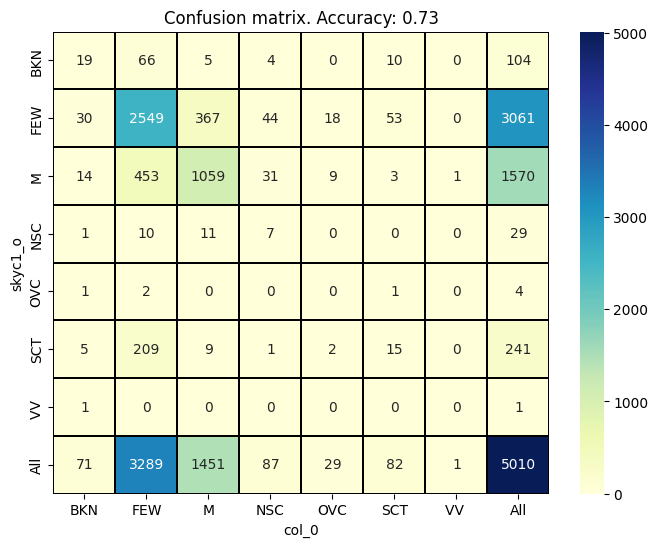

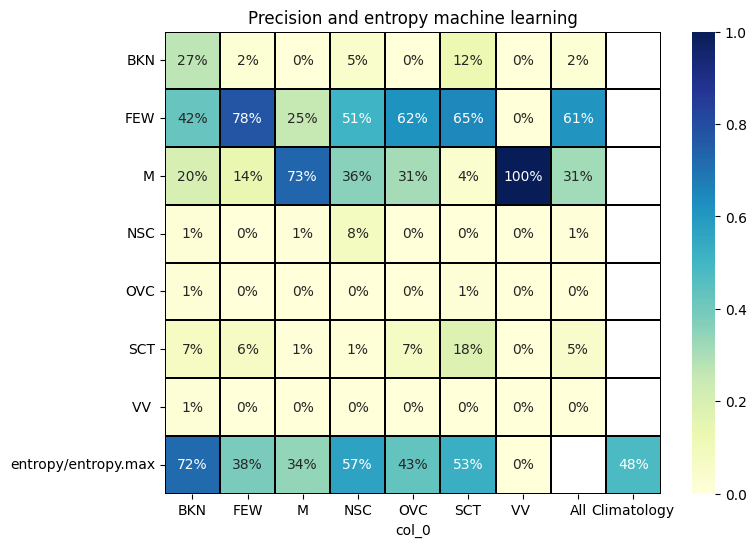

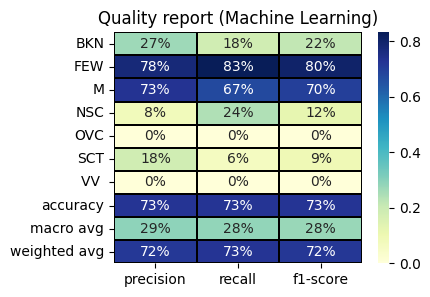

feature feature_per
32          rh1        4.0%
0          dir0        3.7%
52    dayofyear        3.7%
25         dir1        3.4%
34       lhflx1        3.4%
39       shflx1        3.3%
7           rh0        3.1%
35       lwflx1        2.9%
8   visibility0        2.8%
4    wind_gust0        2.8%

Round 7


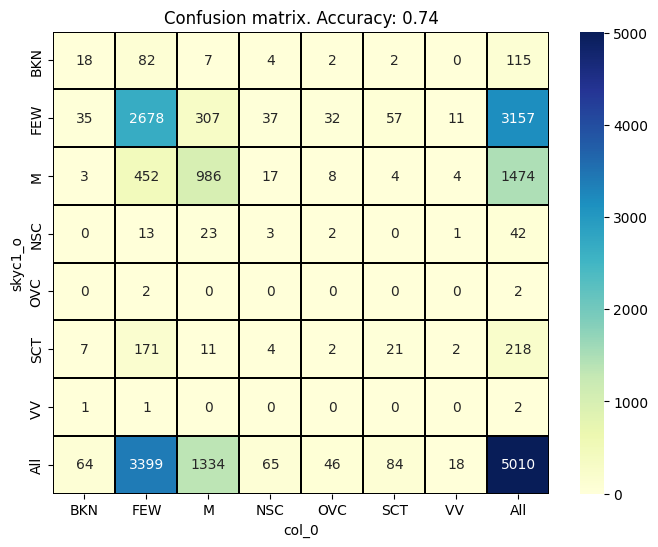

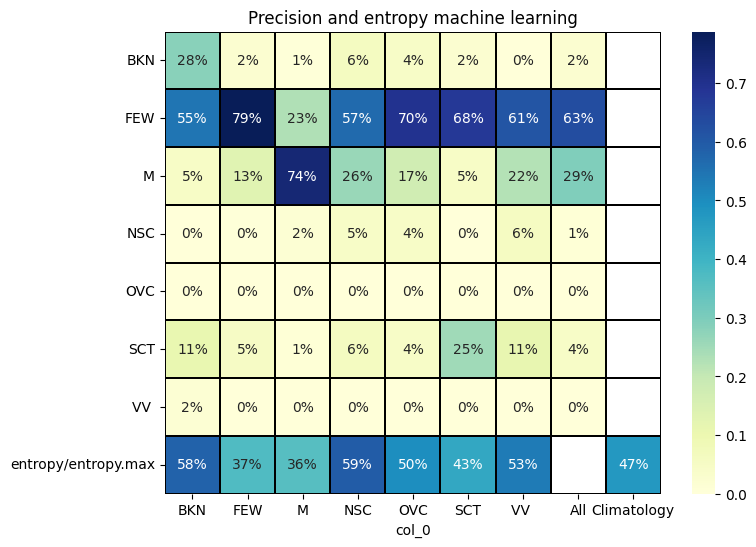

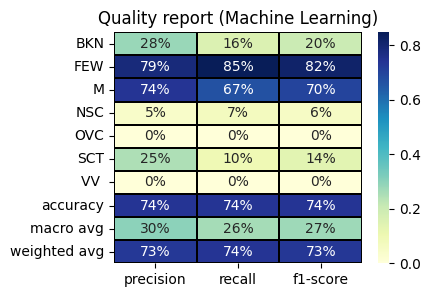

feature feature_per
0        dir0        3.8%
39     shflx1        3.4%
25       dir1        3.4%
34     lhflx1        3.3%
32        rh1        3.3%
52  dayofyear        3.1%
41       cin1        3.1%
7         rh0        3.1%
3        mod0        3.1%
16       cin0        3.0%

Round 8


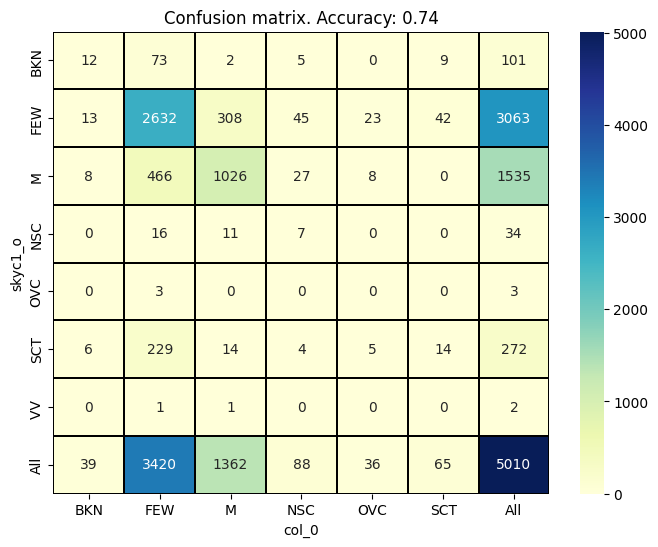

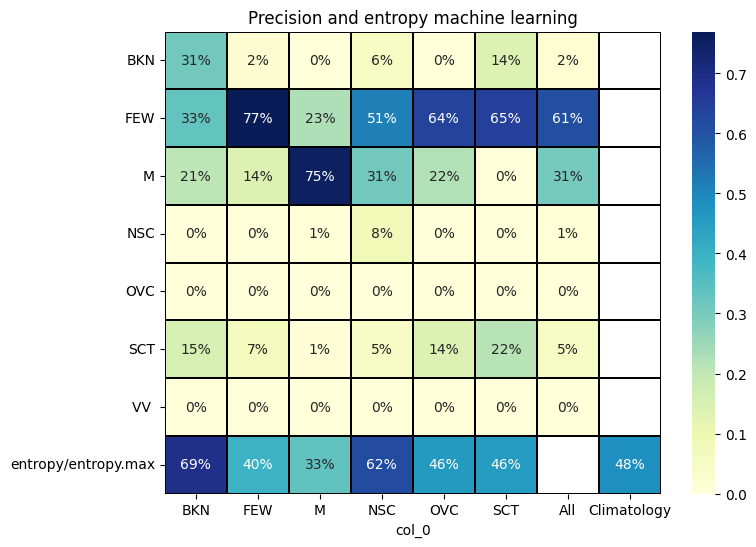

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



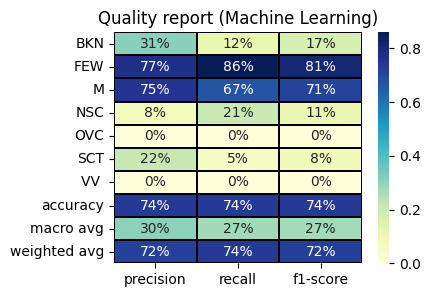

feature feature_per
52    dayofyear        3.9%
3          mod0        3.5%
39       shflx1        3.4%
0          dir0        3.4%
25         dir1        3.3%
32          rh1        3.3%
8   visibility0        3.2%
34       lhflx1        3.2%
7           rh0        3.1%
4    wind_gust0        3.0%

Round 9


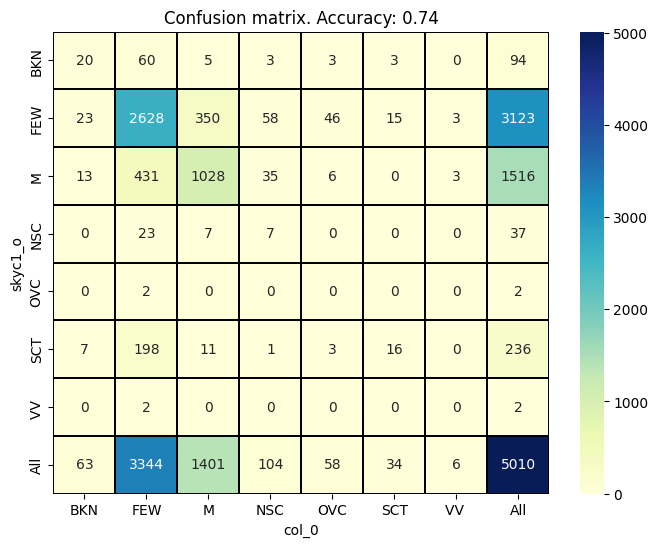

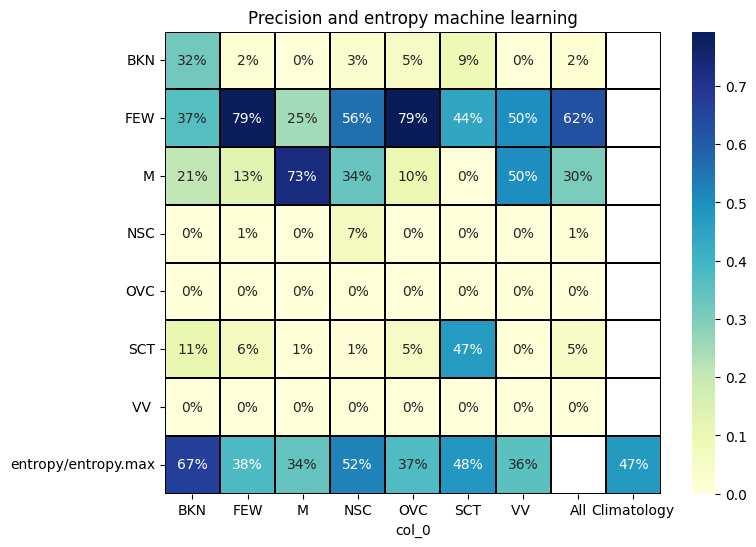

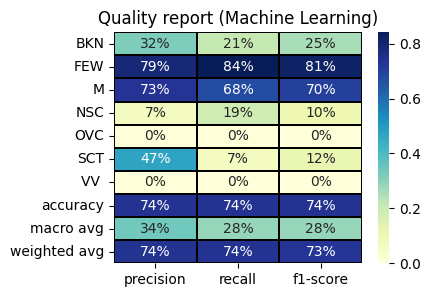

feature feature_per
39     shflx1        3.8%
0        dir0        3.3%
32        rh1        3.3%
25       dir1        3.3%
34     lhflx1        3.2%
41       cin1        3.2%
7         rh0        3.2%
35     lwflx1        3.1%
52  dayofyear        3.1%
16       cin0        3.0%


Accuracy stadistics
        Accuracy
count  10.000000
mean    0.730000
std     0.015635
min     0.700000
25%     0.722500
50%     0.735000
75%     0.740000
max     0.750000
Shapiro test normality
p value: 0.21321217715740204
Accept null hypothesis: normal distribution variable HSS in the samples
chi2_contingency last round
p-value: 4.431526899536554e-62
Significance level: 0.01
Degres of of freedom:  1
Stadistic 276.4622362166681
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 4.12 minutes


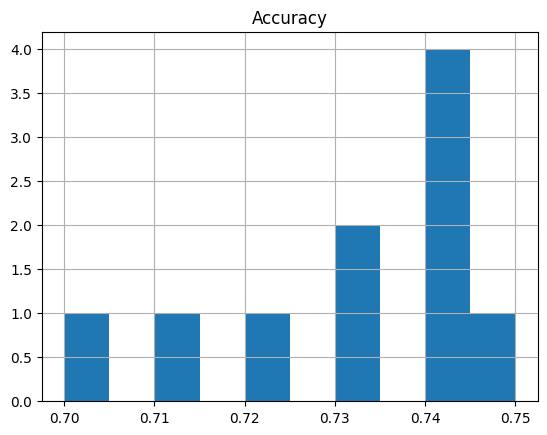

In [4]:
#@title ML LGBMClassifier. Samples 10. Heidke Skill score.

from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro
import math
from scipy.stats import entropy
from sklearn.metrics import accuracy_score

start_time = time.time()

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.skyc1_o
X = df_all.iloc[:,1:]


# loop random
acc_ml = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  #X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))
  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)

  plt.figure(figsize=(8, 6))
  plt.title("Confusion matrix. Accuracy: {}".format(round(acc_ml[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #Precision and entropy
  plt.figure(figsize=(8, 6))
  plt.title("Precision and entropy machine learning")

  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  entropy_values = pd.DataFrame(
    entropy(column_sc, base=2) / (math.log2(column_sc.shape[0])),
    columns=["entropy/entropy.max"],
    index=column_sc.columns).T
  column_sc = pd.concat([column_sc, entropy_values.rename(columns={"All": "Climatology"})])
  seab = sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nAccuracy stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(acc_ml,columns=["Accuracy"]).describe())

#sample less 5000
sta, p = shapiro(acc_ml)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(acc_ml,columns=["Accuracy"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")




In [5]:
#@title Save last algorithm round 9


x_var = X.columns
score = {"acc_ml":acc_ml[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/skyc1_LEBL_d0.al", 'wb'))

Round 0


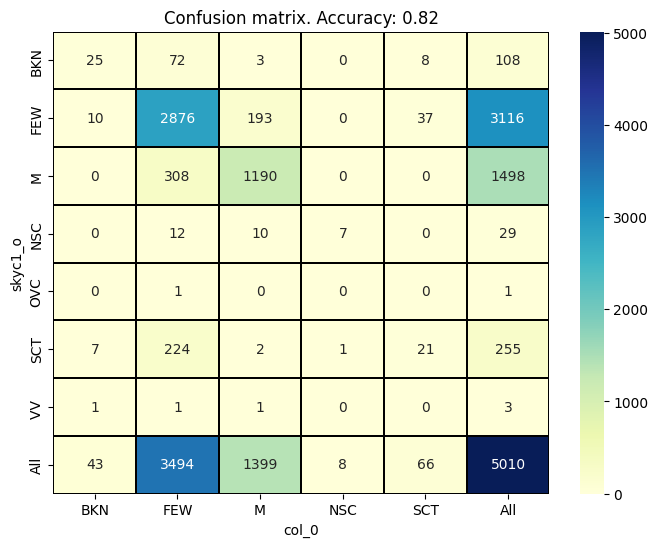

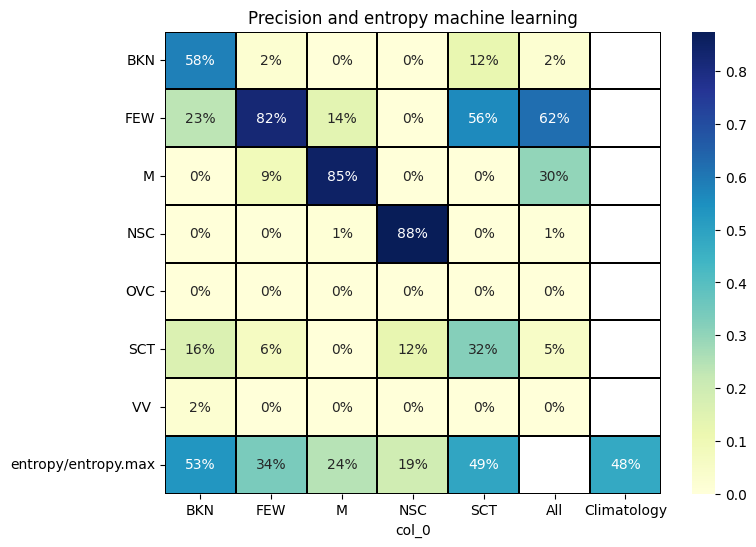

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



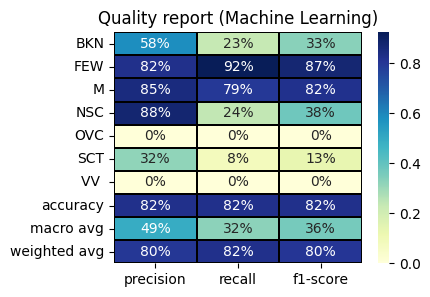

feature feature_per
47  HGT8501        3.0%
22  HGT8500        3.0%
35   lwflx1        2.9%
30    mslp1        2.8%
10   lwflx0        2.7%
5     mslp0        2.7%
46  HGT5001        2.7%
21  HGT5000        2.6%
7       rh0        2.6%
24    T8500        2.5%

Round 1


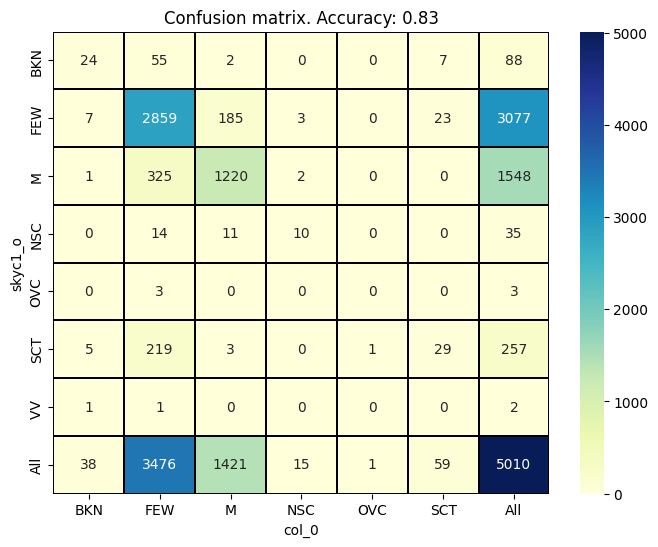

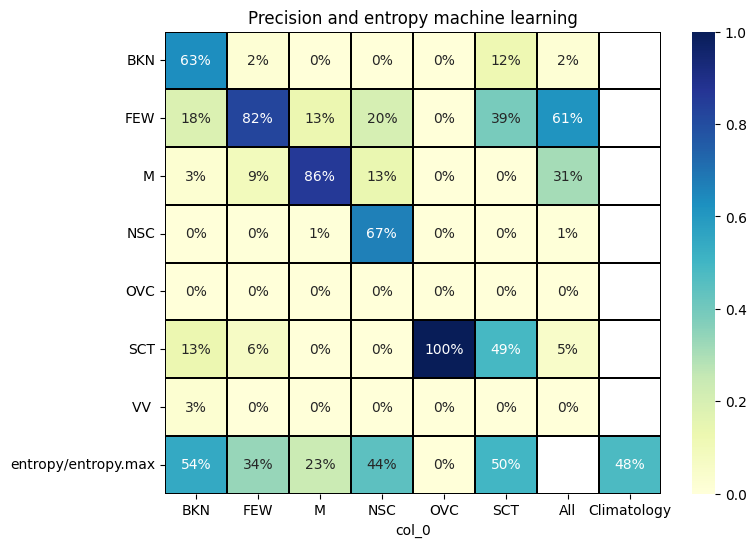

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



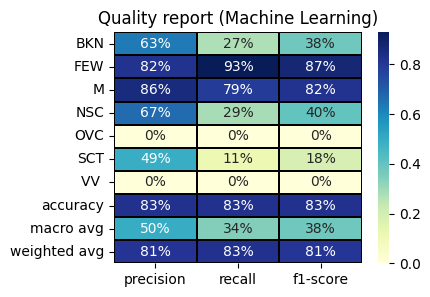

feature feature_per
35   lwflx1        3.0%
22  HGT8500        3.0%
47  HGT8501        2.9%
10   lwflx0        2.8%
5     mslp0        2.7%
46  HGT5001        2.7%
30    mslp1        2.7%
21  HGT5000        2.6%
7       rh0        2.6%
25     dir1        2.5%

Round 2


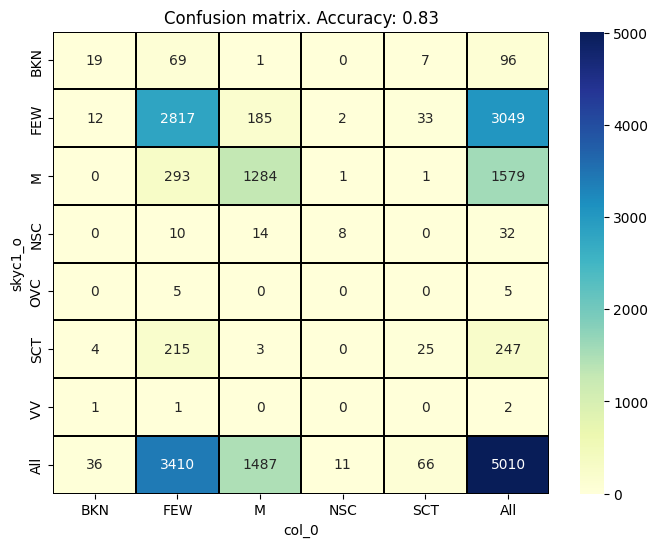

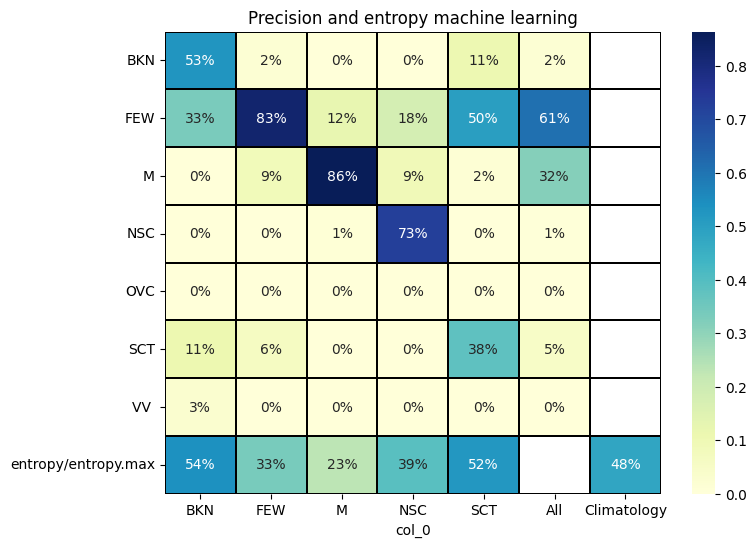

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



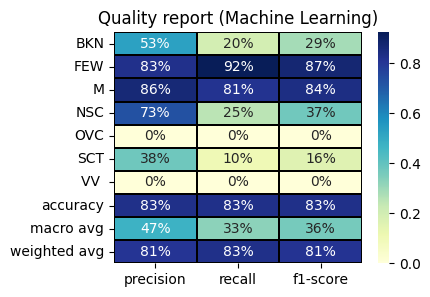

feature feature_per
22  HGT8500        3.1%
47  HGT8501        3.0%
35   lwflx1        2.9%
30    mslp1        2.9%
7       rh0        2.7%
10   lwflx0        2.6%
5     mslp0        2.6%
25     dir1        2.6%
46  HGT5001        2.6%
21  HGT5000        2.5%

Round 3


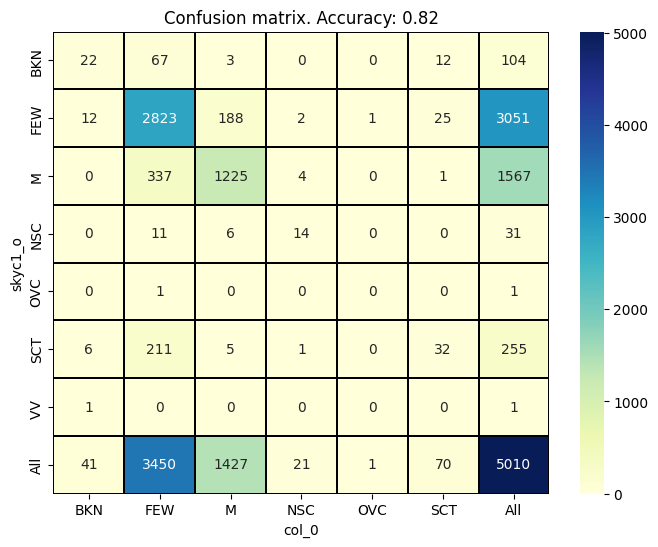

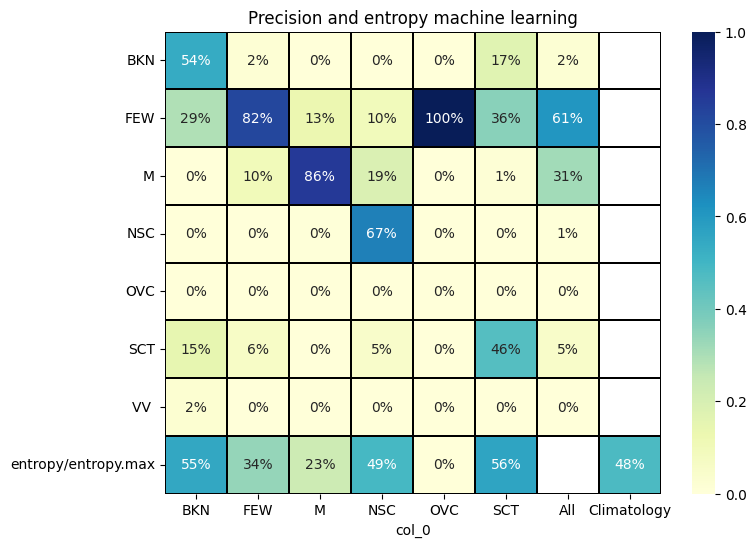

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



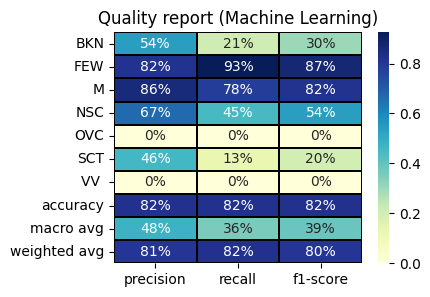

feature feature_per
22  HGT8500        3.1%
35   lwflx1        2.9%
47  HGT8501        2.9%
30    mslp1        2.8%
5     mslp0        2.8%
46  HGT5001        2.7%
21  HGT5000        2.6%
25     dir1        2.6%
10   lwflx0        2.6%
7       rh0        2.6%

Round 4


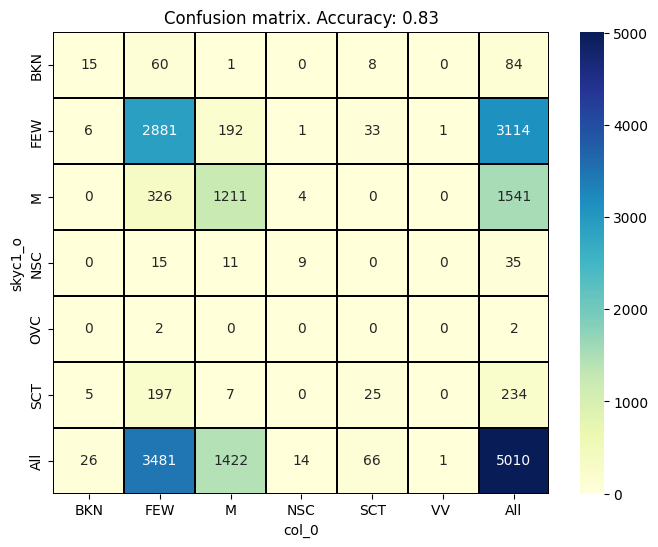

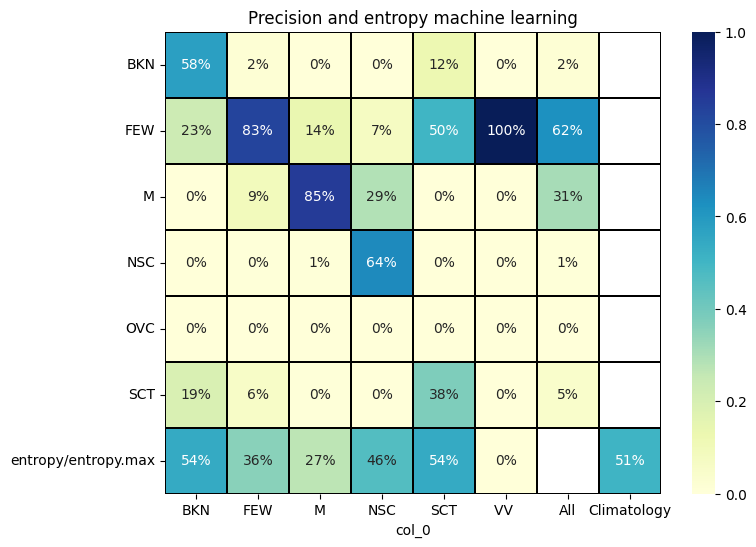

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

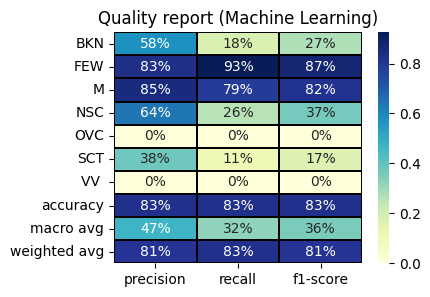

feature feature_per
22  HGT8500        3.0%
47  HGT8501        3.0%
35   lwflx1        3.0%
30    mslp1        2.7%
10   lwflx0        2.7%
5     mslp0        2.7%
21  HGT5000        2.6%
7       rh0        2.6%
46  HGT5001        2.6%
25     dir1        2.5%

Round 5


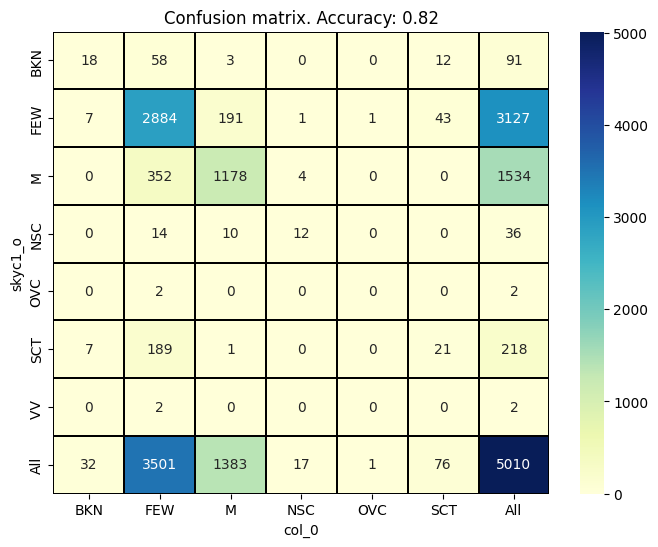

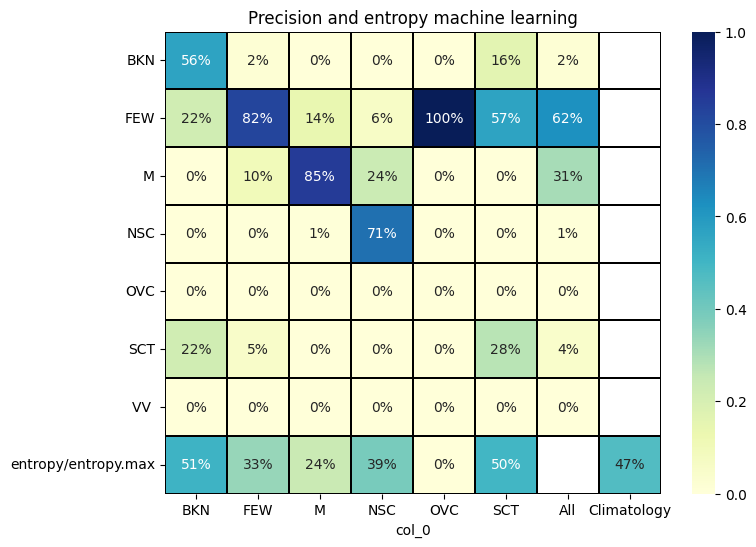

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



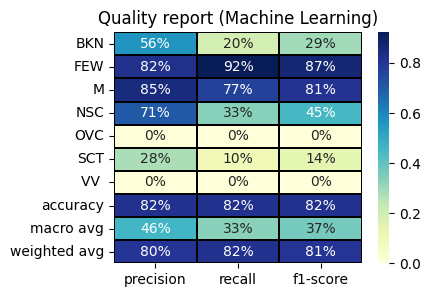

feature feature_per
47  HGT8501        3.0%
22  HGT8500        3.0%
35   lwflx1        2.9%
30    mslp1        2.9%
21  HGT5000        2.7%
7       rh0        2.6%
10   lwflx0        2.6%
25     dir1        2.6%
5     mslp0        2.6%
46  HGT5001        2.5%

Round 6


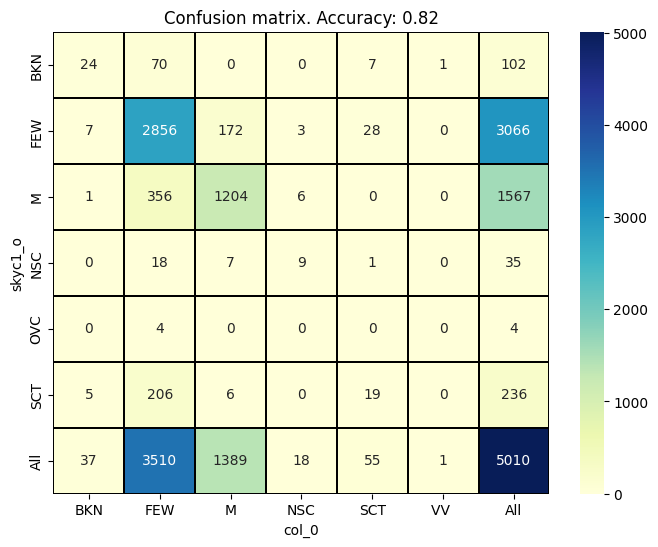

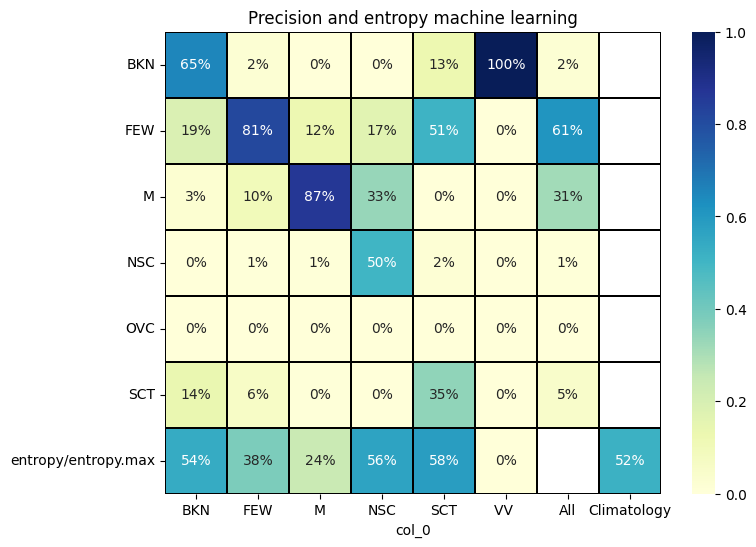

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

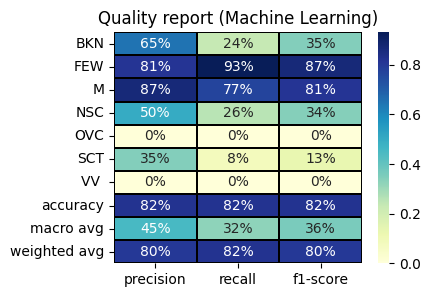

feature feature_per
47  HGT8501        3.2%
22  HGT8500        3.0%
5     mslp0        2.8%
35   lwflx1        2.7%
30    mslp1        2.7%
7       rh0        2.6%
10   lwflx0        2.6%
25     dir1        2.6%
46  HGT5001        2.6%
21  HGT5000        2.5%

Round 7


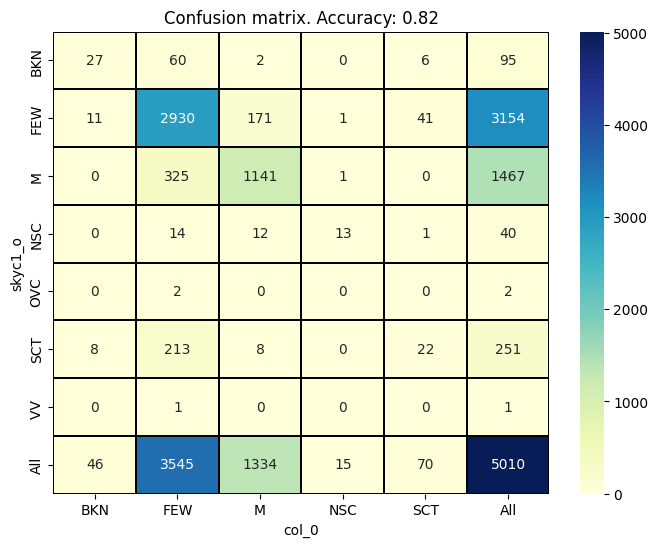

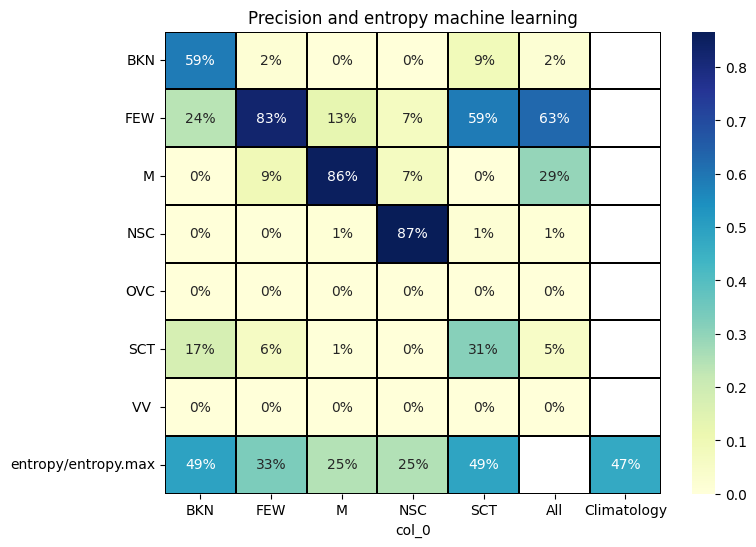

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



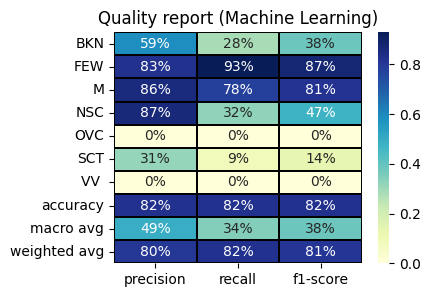

feature feature_per
47  HGT8501        3.1%
22  HGT8500        3.0%
35   lwflx1        3.0%
5     mslp0        2.7%
10   lwflx0        2.7%
30    mslp1        2.7%
46  HGT5001        2.7%
21  HGT5000        2.6%
7       rh0        2.6%
25     dir1        2.6%

Round 8


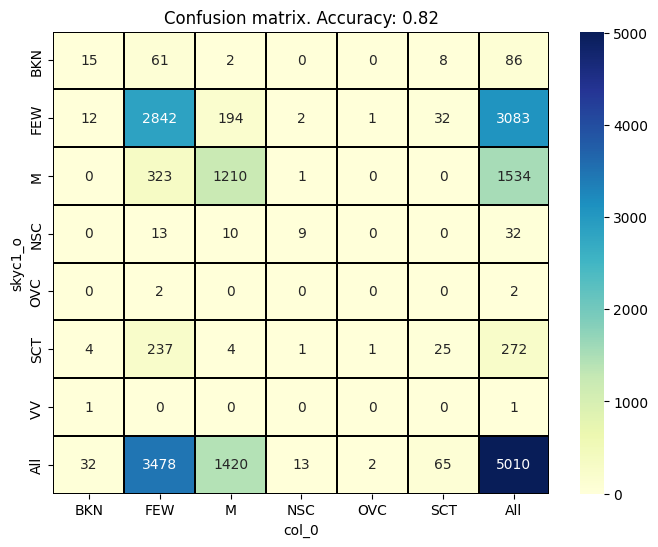

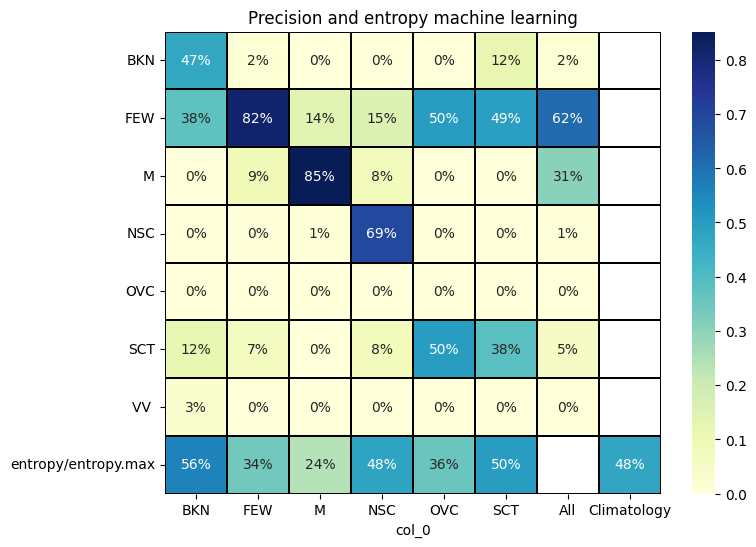

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



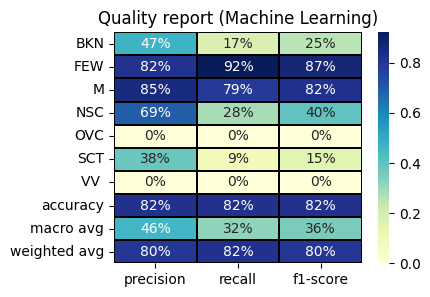

feature feature_per
47  HGT8501        3.1%
30    mslp1        2.9%
22  HGT8500        2.9%
35   lwflx1        2.9%
21  HGT5000        2.7%
7       rh0        2.7%
5     mslp0        2.6%
10   lwflx0        2.6%
46  HGT5001        2.6%
25     dir1        2.5%

Round 9


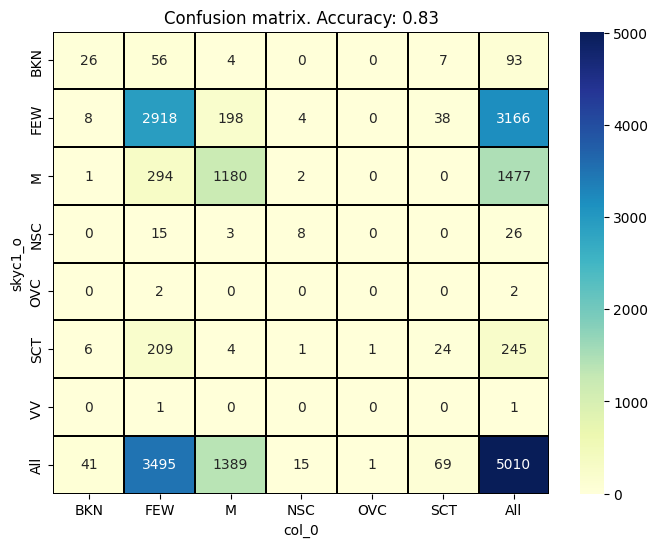

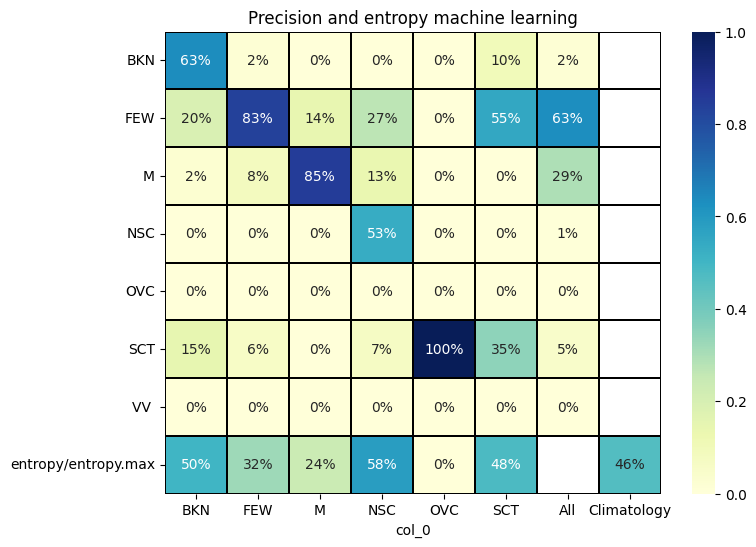

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



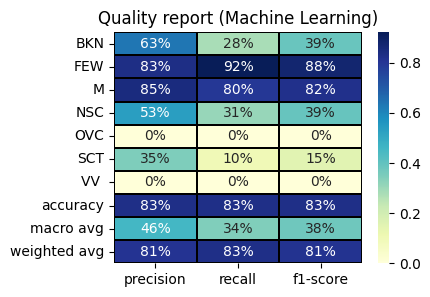

feature feature_per
22  HGT8500        3.2%
35   lwflx1        2.9%
47  HGT8501        2.8%
21  HGT5000        2.7%
5     mslp0        2.7%
7       rh0        2.7%
25     dir1        2.7%
10   lwflx0        2.6%
46  HGT5001        2.5%
30    mslp1        2.5%


Accuracy stadistics
        Accuracy
count  10.000000
mean    0.824000
std     0.005164
min     0.820000
25%     0.820000
50%     0.820000
75%     0.830000
max     0.830000
Shapiro test normality
p value: 0.00016868000966496766
Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples
chi2_contingency last round
p-value: 2.4537461057792216e-149
Significance level: 0.01
Degres of of freedom:  1
Stadistic 677.4023362212209
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.4 minutes


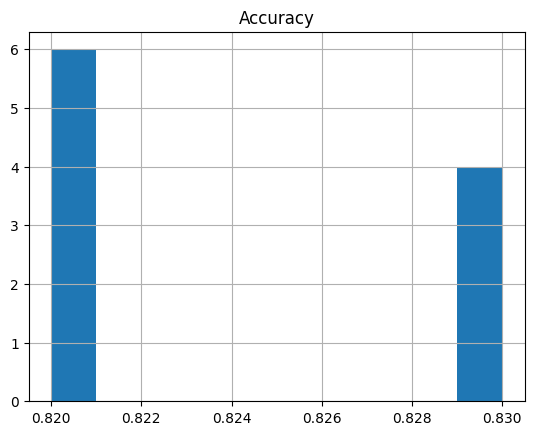

In [6]:
#@title ML RandomForestClassifier. Samples 10. Heidke Skill score.
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro
import math
from scipy.stats import entropy
from sklearn.metrics import accuracy_score

start_time = time.time()

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.skyc1_o
X = df_all.iloc[:,1:]



# loop random
acc_ml = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  #X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  #ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  ml_model = ExtraTreesClassifier().fit(X_train,y_train)
  #ml_model = Perceptron().fit(X_res,y_res)
  #ml_model = RandomForestClassifier().fit(X_res,y_res)
  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))
  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)

  plt.figure(figsize=(8, 6))
  plt.title("Confusion matrix. Accuracy: {}".format(round(acc_ml[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #Precision and entropy
  plt.figure(figsize=(8, 6))
  plt.title("Precision and entropy machine learning")

  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  entropy_values = pd.DataFrame(
    entropy(column_sc, base=2) / (math.log2(column_sc.shape[0])),
    columns=["entropy/entropy.max"],
    index=column_sc.columns).T
  column_sc = pd.concat([column_sc, entropy_values.rename(columns={"All": "Climatology"})])
  seab = sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nAccuracy stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(acc_ml,columns=["Accuracy"]).describe())

#sample less 5000
sta, p = shapiro(acc_ml)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(acc_ml,columns=["Accuracy"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")








In [7]:
#@title Save last heavy algorithm round 9
x_var = X.columns
score = {"acc_ml":acc_ml[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
#pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/skyc1_LEBL_d0.al", 'wb'))

Round 0


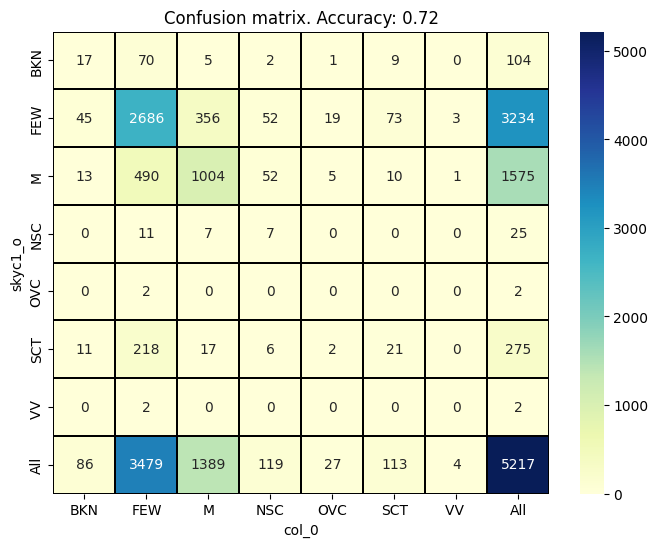

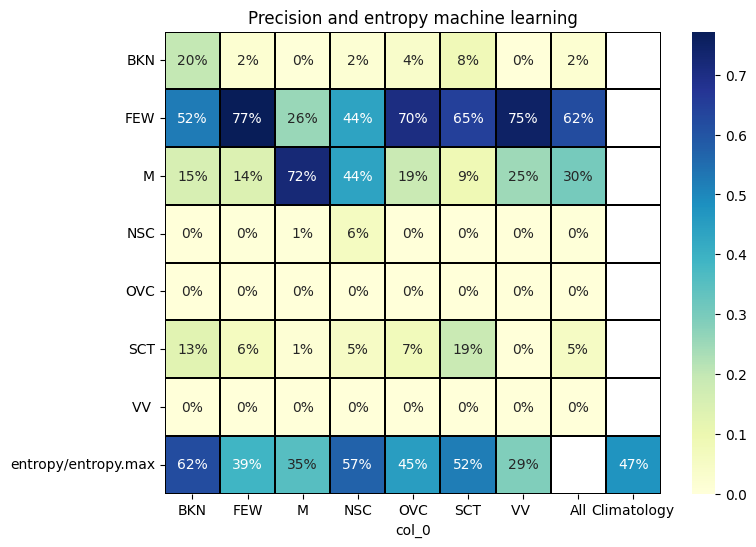

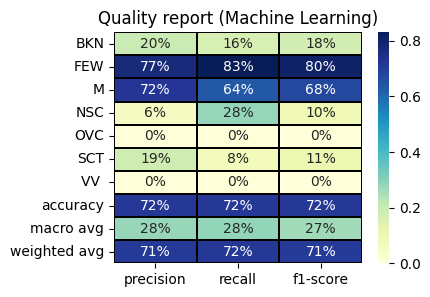

feature feature_per
39     shflx1        4.1%
34     lhflx1        3.6%
52  dayofyear        3.6%
32        rh1        3.6%
0        dir0        3.2%
41       cin1        3.2%
25       dir1        3.0%
7         rh0        2.9%
16       cin0        2.9%
14     shflx0        2.8%

Round 1


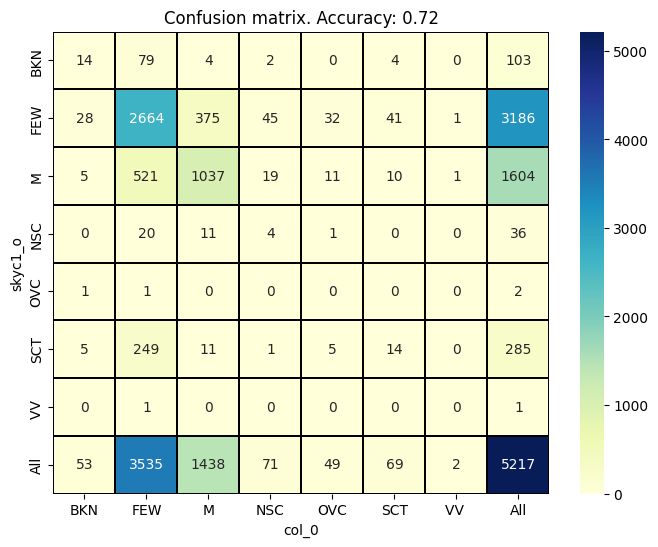

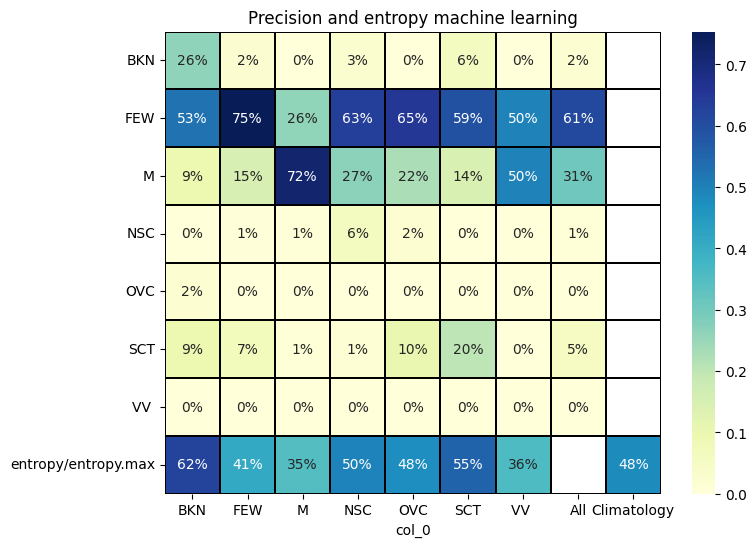

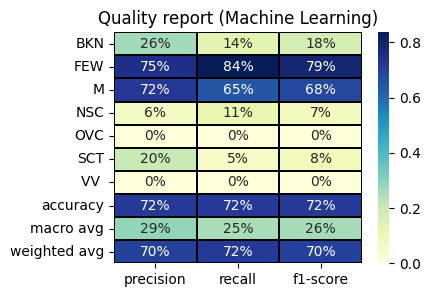

feature feature_per
7         rh0        4.1%
0        dir0        3.8%
39     shflx1        3.8%
52  dayofyear        3.7%
32        rh1        3.7%
34     lhflx1        3.7%
3        mod0        3.4%
16       cin0        3.0%
25       dir1        2.9%
10     lwflx0        2.8%

Round 2


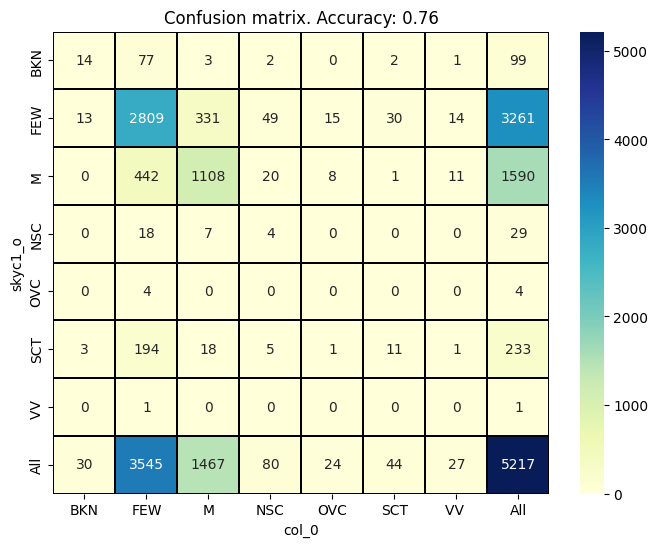

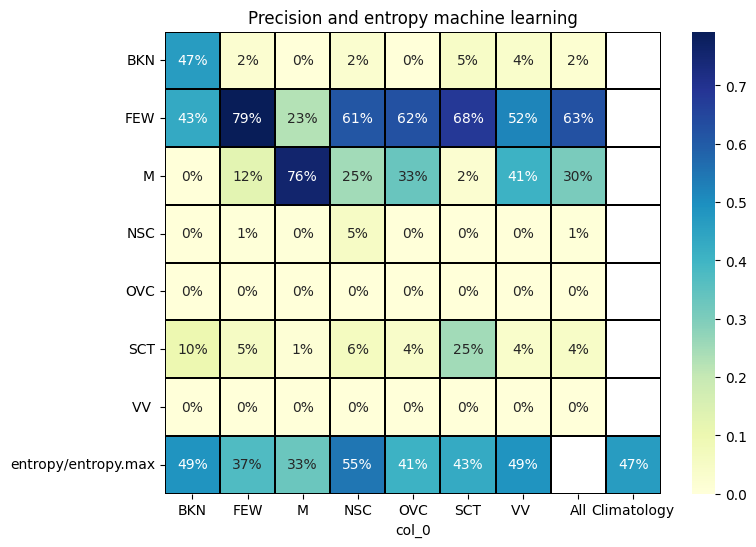

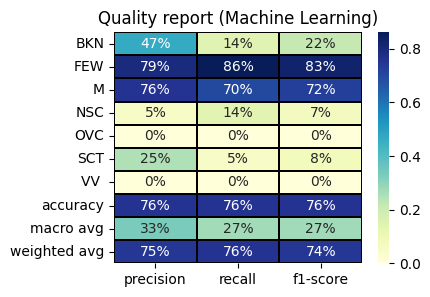

feature feature_per
39       shflx1        3.8%
52    dayofyear        3.5%
32          rh1        3.4%
8   visibility0        3.3%
25         dir1        3.3%
0          dir0        3.2%
34       lhflx1        3.2%
7           rh0        2.9%
14       shflx0        2.8%
16         cin0        2.8%

Round 3


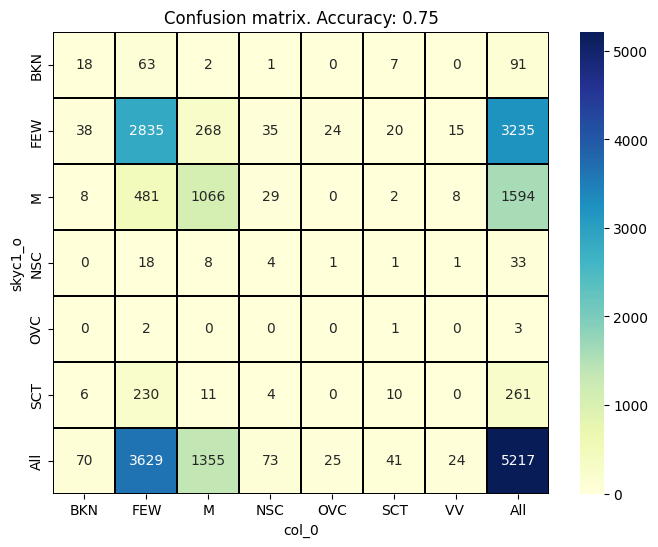

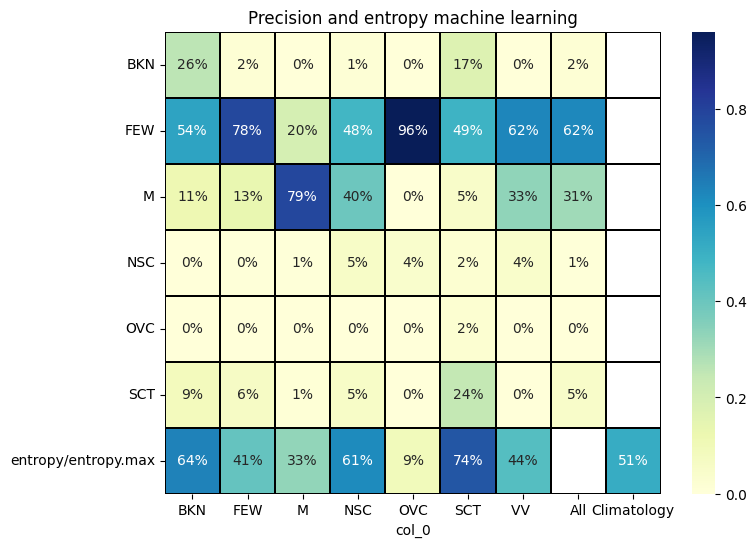

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



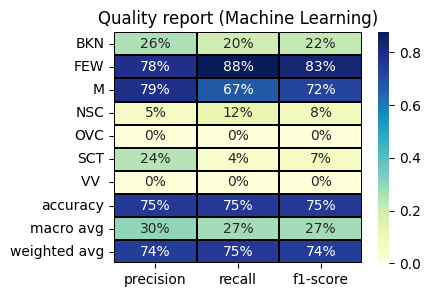

feature feature_per
0          dir0        4.3%
32          rh1        4.1%
39       shflx1        3.5%
52    dayofyear        3.3%
25         dir1        3.2%
34       lhflx1        3.1%
8   visibility0        3.1%
41         cin1        3.1%
7           rh0        3.0%
35       lwflx1        3.0%

Round 4


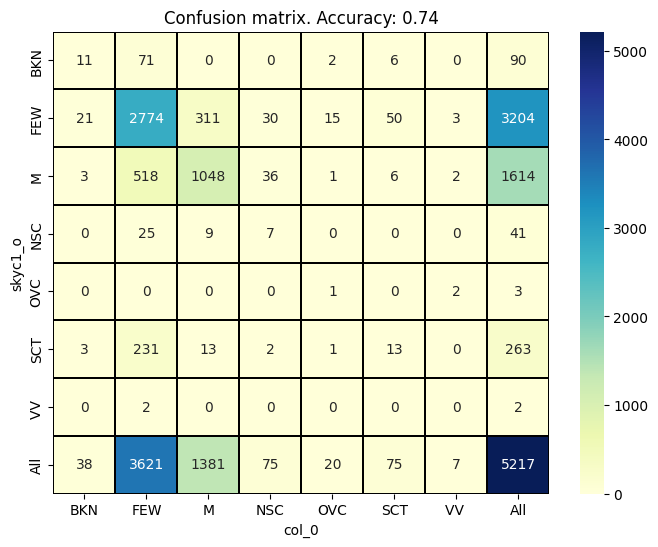

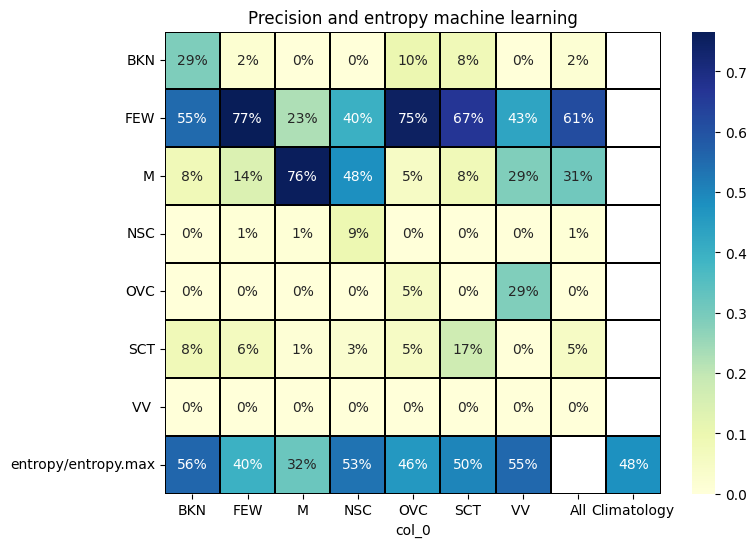

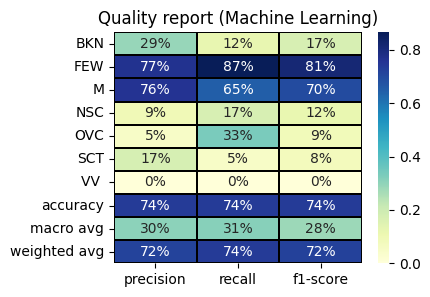

feature feature_per
14       shflx0        3.7%
34       lhflx1        3.6%
52    dayofyear        3.4%
0          dir0        3.4%
32          rh1        3.3%
39       shflx1        3.2%
7           rh0        3.1%
25         dir1        3.0%
8   visibility0        2.8%
16         cin0        2.8%

Round 5


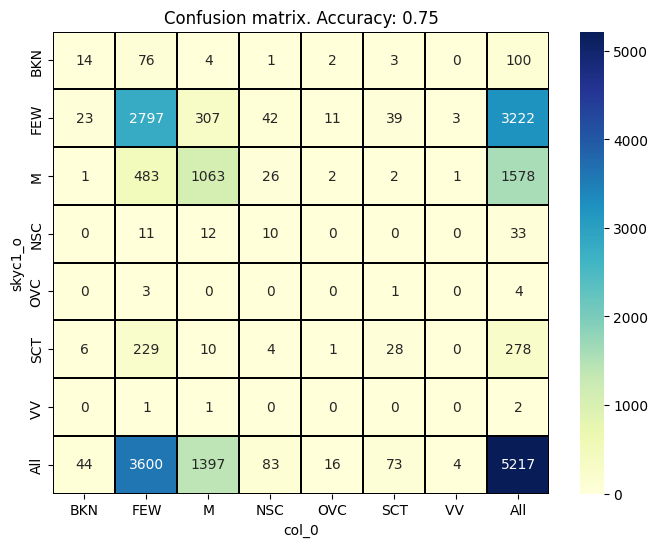

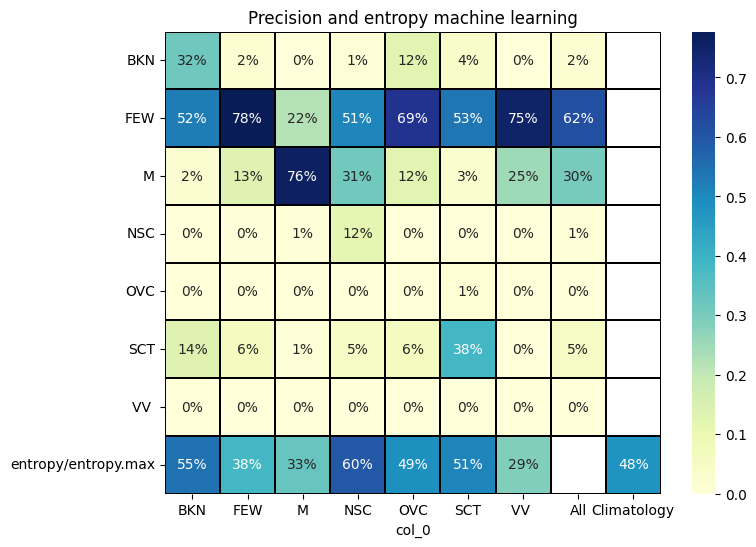

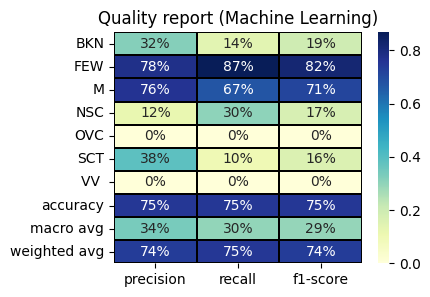

feature feature_per
0          dir0        3.6%
41         cin1        3.6%
39       shflx1        3.3%
52    dayofyear        3.3%
34       lhflx1        3.3%
32          rh1        3.2%
25         dir1        3.0%
35       lwflx1        3.0%
8   visibility0        2.9%
16         cin0        2.9%

Round 6


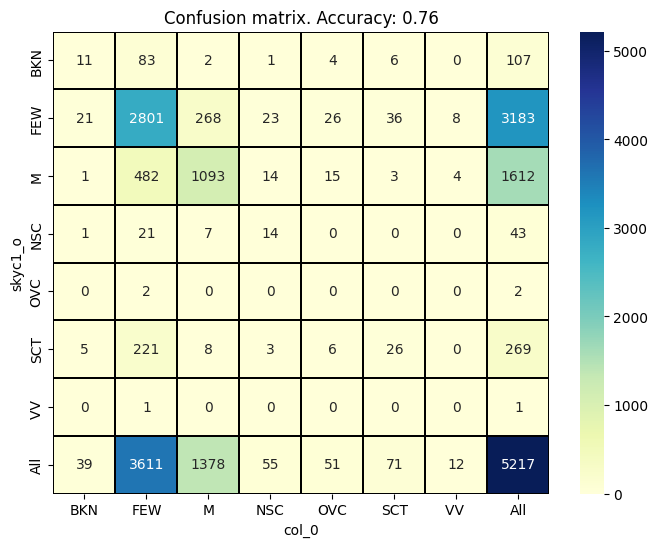

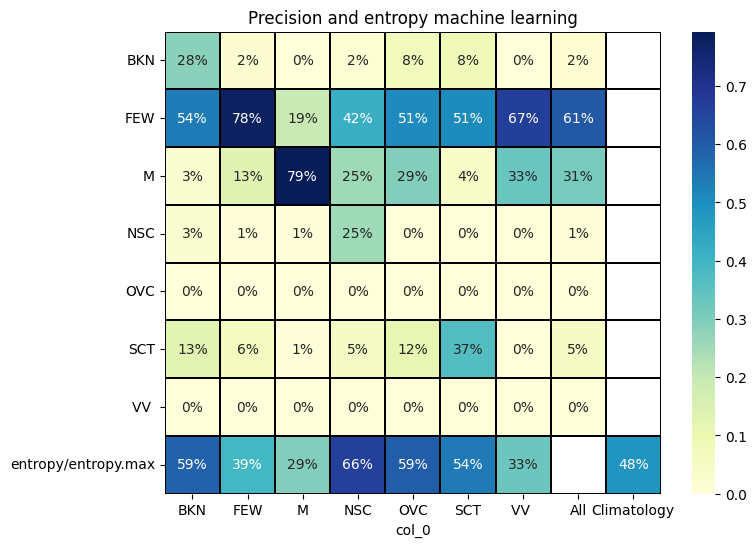

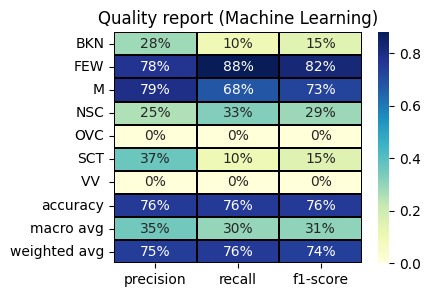

feature feature_per
39       shflx1        4.2%
52    dayofyear        3.6%
34       lhflx1        3.3%
0          dir0        3.2%
32          rh1        3.2%
3          mod0        3.2%
25         dir1        3.1%
8   visibility0        3.0%
41         cin1        3.0%
14       shflx0        2.9%

Round 7


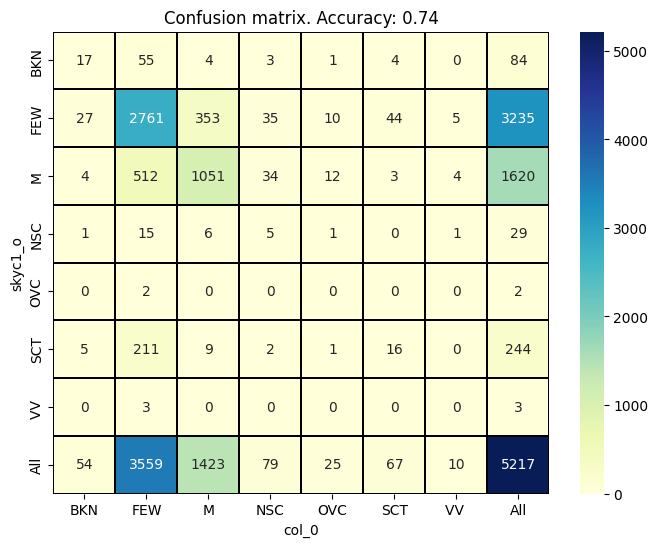

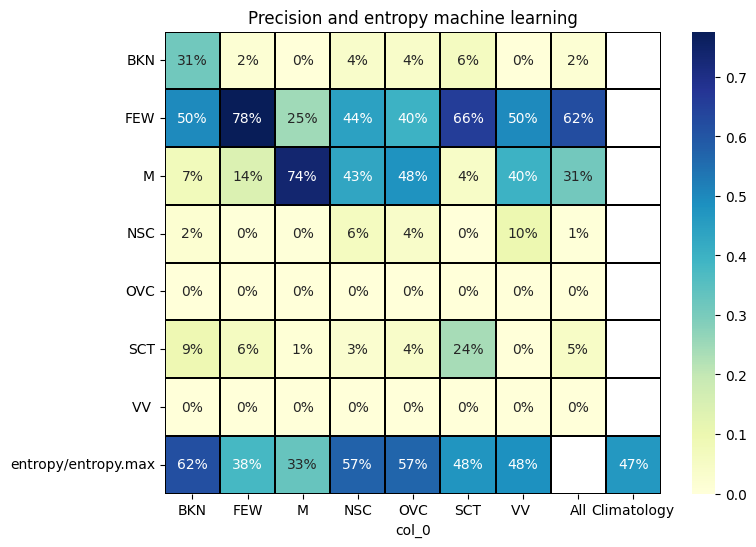

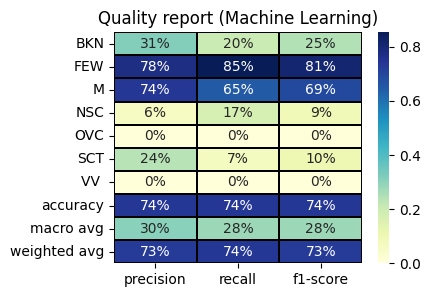

feature feature_per
0          dir0        3.7%
34       lhflx1        3.7%
52    dayofyear        3.6%
32          rh1        3.6%
7           rh0        3.5%
25         dir1        3.4%
39       shflx1        3.3%
3          mod0        3.1%
8   visibility0        3.1%
41         cin1        3.0%

Round 8


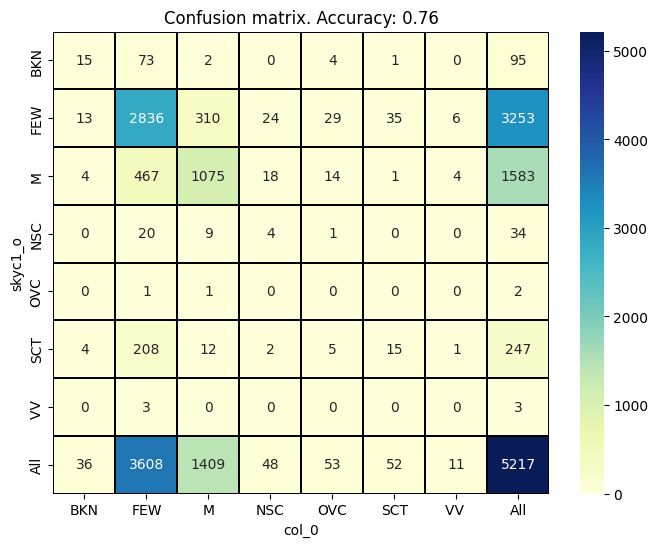

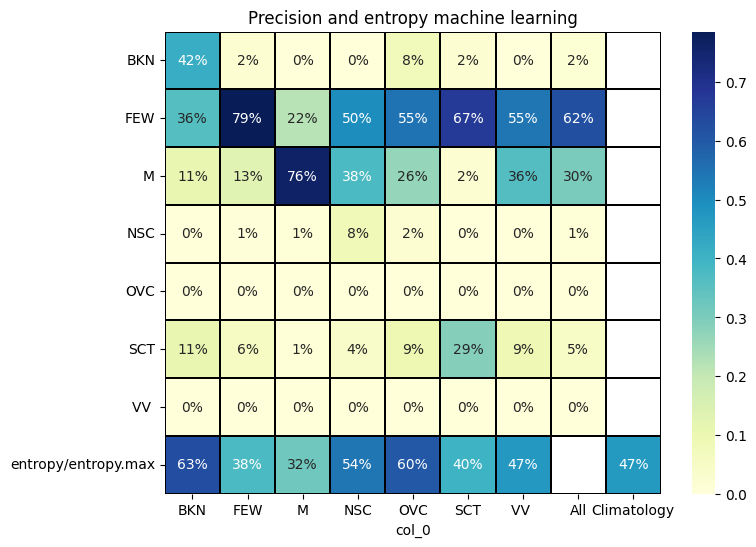

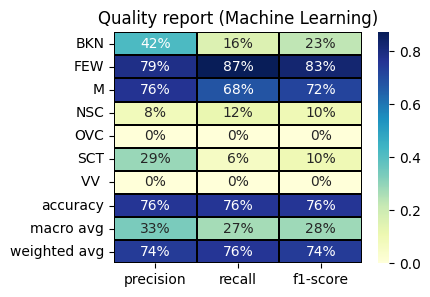

feature feature_per
39       shflx1        3.9%
52    dayofyear        3.5%
32          rh1        3.5%
0          dir0        3.4%
34       lhflx1        3.3%
41         cin1        3.2%
25         dir1        3.0%
8   visibility0        3.0%
14       shflx0        3.0%
7           rh0        2.9%

Round 9


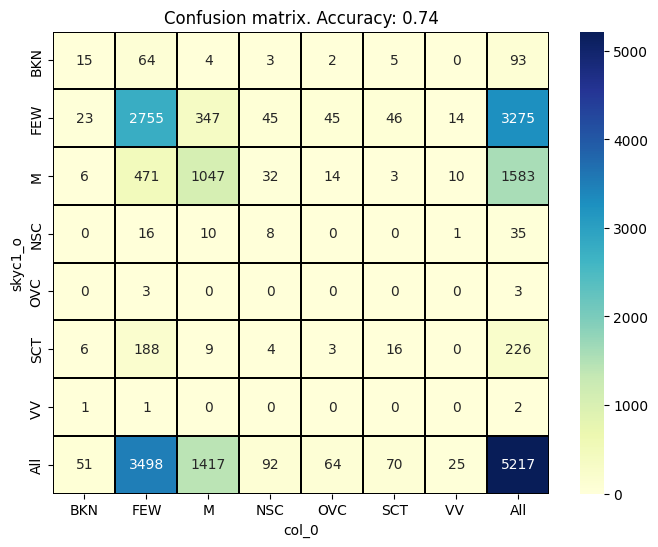

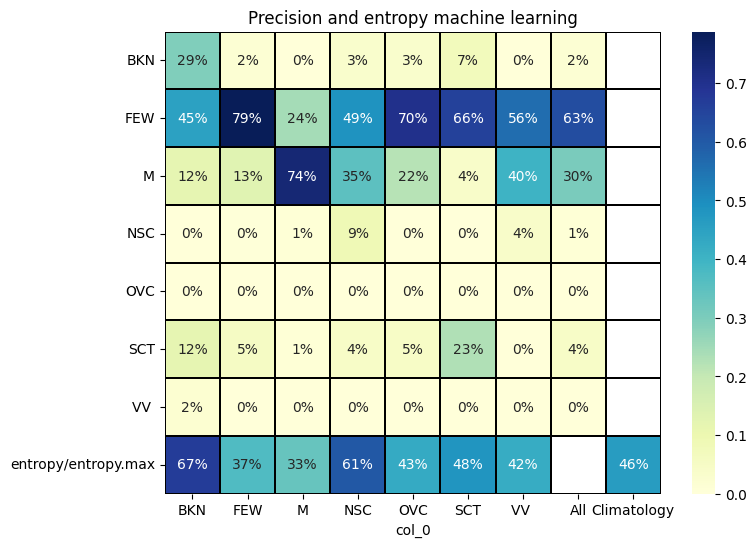

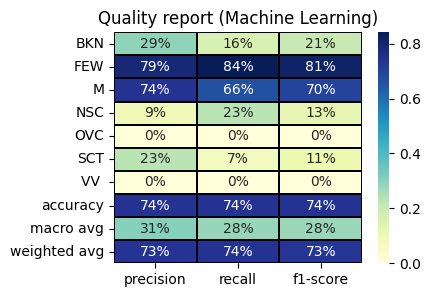

feature feature_per
52  dayofyear        3.7%
7         rh0        3.5%
39     shflx1        3.4%
16       cin0        3.4%
32        rh1        3.4%
34     lhflx1        3.3%
0        dir0        3.1%
6       temp0        3.0%
9      lhflx0        3.0%
25       dir1        2.9%


Accuracy stadistics
        Accuracy
count  10.000000
mean    0.744000
std     0.015055
min     0.720000
25%     0.740000
50%     0.745000
75%     0.757500
max     0.760000
Shapiro test normality
p value: 0.08894499391317368
Accept null hypothesis: normal distribution variable HSS in the samples
chi2_contingency last round
p-value: 6.46324062377804e-41
Significance level: 0.01
Degres of of freedom:  1
Stadistic 179.42736738739512
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 3.46 minutes


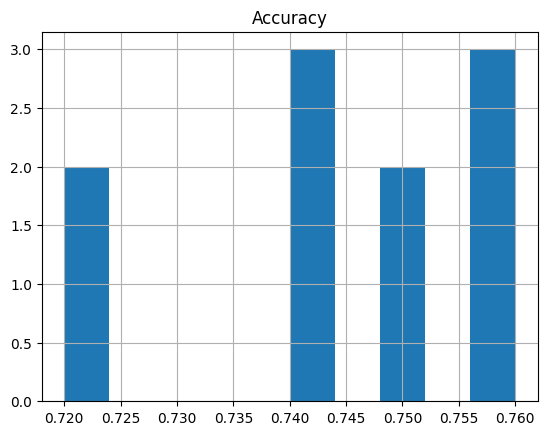

In [8]:
#@title Load meteorological model forecast D1. ML LGBMClassifier. Samples 10. Heidke Skill score.
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2020.csv",parse_dates=["time"])

model = pd.concat([mody2018,mody2019,mody2020]).drop(columns=["Unnamed: 0"]).set_index("time")

#concat station file versus meteorological model file same time
df_all = pd.concat([station,model],axis=1).dropna()
df_all["skyc1_o"] = pd.Categorical(df_all["skyc1_o"])

start_time = time.time()

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.skyc1_o
X = df_all.iloc[:,1:]


# loop random
acc_ml = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  #X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))
  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)

  plt.figure(figsize=(8, 6))
  plt.title("Confusion matrix. Accuracy: {}".format(round(acc_ml[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #Precision and entropy
  plt.figure(figsize=(8, 6))
  plt.title("Precision and entropy machine learning")

  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  entropy_values = pd.DataFrame(
    entropy(column_sc, base=2) / (math.log2(column_sc.shape[0])),
    columns=["entropy/entropy.max"],
    index=column_sc.columns).T
  column_sc = pd.concat([column_sc, entropy_values.rename(columns={"All": "Climatology"})])
  seab = sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nAccuracy stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(acc_ml,columns=["Accuracy"]).describe())

#sample less 5000
sta, p = shapiro(acc_ml)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(acc_ml,columns=["Accuracy"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")


In [9]:
#@title Save last algorithm round 9


x_var = X.columns
score = {"acc_ml":acc_ml[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/skyc1_LEBL_d1.al", 'wb'))